# Assignment

Repeat the training and prediction workflow as above for two other features in the data, namely: Systole and Diastole values. Use 70 training and 30 testing samples where the labels are assigned according to the condition: 0 if 'non-smoker', 1 if 'smoker'.

Use the above code to 
- train the random forest classifier
- create state space plots with scatter plot, categorical colouring, and probability contour plot
- compare the predicted and actual labels to check how well the trained model performed: how many of the 30 test data points are correctly predicted?
- plot the feature importances to check how much the systolic and diastolic values contributed to the predictions. 


In [1]:
from pandas import read_csv

from numpy import arange, asarray, linspace, c_, meshgrid, zeros, ones
from numpy.random import uniform, seed

from matplotlib.pyplot import subplots, scatter, xlabel, ylabel, xticks

from sklearn.ensemble import RandomForestClassifier


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = read_csv('data/patients_data.csv')
sample_train = int(0.7*df.shape[0])
print(sample_train)
df_np = df.to_numpy()
X = df_np[:sample_train, [3, 4]]
y = df['Smoker'][:sample_train]
print(X.shape)
print(y.shape)

70
(70, 2)
(70,)


In [3]:
RANDOM_SEED = 555
seed(RANDOM_SEED)
clf = RandomForestClassifier(random_state = RANDOM_SEED)
clf.fit(X, y)

RandomForestClassifier(random_state=555)

In [8]:
X_test = df_np[sample_train:, [3, 4]]

predict_test = clf.predict(X_test)

probab_test = clf.predict_proba(X_test)

print(predict_test)
print(probab_test)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0]
[[0.96       0.04      ]
 [0.67       0.33      ]
 [1.         0.        ]
 [0.96       0.04      ]
 [0.97       0.03      ]
 [0.705      0.295     ]
 [1.         0.        ]
 [0.96       0.04      ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.9575     0.0425    ]
 [0.05       0.95      ]
 [0.36666667 0.63333333]
 [1.         0.        ]
 [0.17       0.83      ]
 [0.         1.        ]
 [0.         1.        ]
 [0.905      0.095     ]
 [1.         0.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.56895238 0.43104762]
 [0.5        0.5       ]
 [0.         1.        ]
 [0.19       0.81      ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]]


In [10]:
X1_min, X1_max = min(X[:, 0]), max(X[:, 0])
X2_min, X2_max = min(X[:, 1]), max(X[:, 1])

resolution = 100

vec_a = linspace(X1_min, X1_max, resolution)
vec_b = linspace(X2_min, X2_max, resolution)

grid_a, grid_b = meshgrid(vec_a, vec_b)


grid_a_flat = grid_a.ravel()
grid_b_flat = grid_b.ravel()

X_statespace = c_[grid_a_flat, grid_b_flat]

predict = clf.predict(X_statespace)
probabs = clf.predict_proba(X_statespace)

print(predict)
print(probabs)

[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


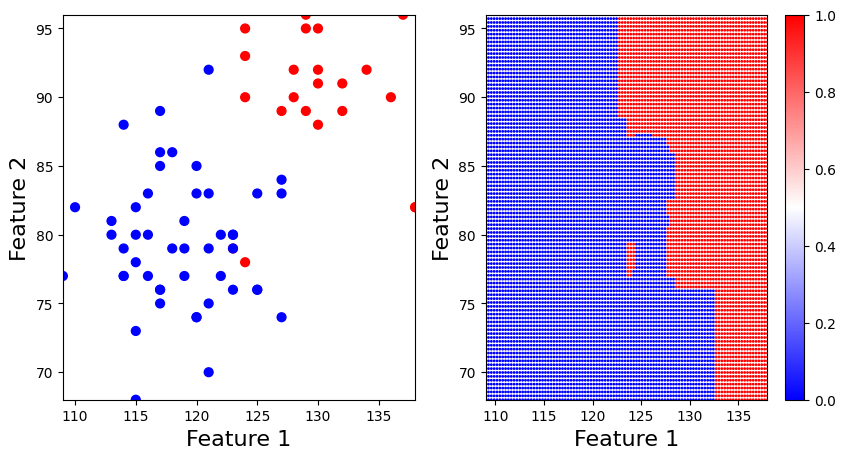

In [24]:
feature_1, feature_2 = 0, 1

fig, ax = subplots(ncols=2, nrows=1, figsize=(10, 5));

ax[0].scatter(X[:, feature_1], X[:, feature_2], c=y, s=40, cmap='bwr');
ax[0].set_xlim(X1_min, X1_max);
ax[0].set_ylim(X2_min, X2_max);
ax[0].set_xlabel('Feature 1', fontsize=16);
ax[0].set_ylabel('Feature 2', fontsize=16);

cax1 = ax[1].scatter(X_statespace[:, feature_1], X_statespace[:, feature_2], c=predict, s=1, cmap='bwr');
ax[1].set_xlabel('Feature 1', fontsize=16);
ax[1].set_ylabel('Feature 2', fontsize=16);
ax[1].set_xlim(X1_min, X1_max);
ax[1].set_ylim(X2_min, X2_max);
fig.colorbar(cax1, ax=ax[1]);

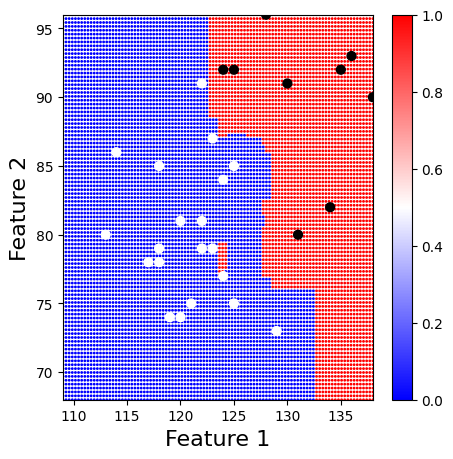

In [23]:
fig, ax = subplots(ncols=1, nrows=1, figsize=(5, 5));

cax1 = ax.scatter(X_statespace[:, feature_1], X_statespace[:, feature_2], c=predict, s=1, cmap='bwr');
ax.scatter(X_test[:, feature_1], X_test[:, feature_2], c=predict_test, s=40, cmap='Greys');
ax.set_xlabel('Feature 1', fontsize=16);
ax.set_ylabel('Feature 2', fontsize=16);
ax.set_xlim(X1_min, X1_max);
ax.set_ylim(X2_min, X2_max);
fig.colorbar(cax1);

Features importances:
Feature 1: 55.1%; Feature 2: 44.9%



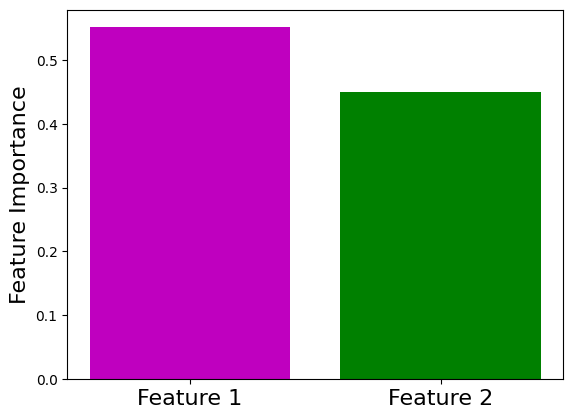

In [25]:
importances = clf.feature_importances_

print('Features importances:')
template = 'Feature 1: {:.1f}%; Feature 2: {:.1f}%'
print(template.format(importances[0]*100, importances[1]*100))
print('')

bins = arange(importances.shape[0])

fig, ax = subplots()

ax.bar(bins, importances, color=('m', 'g'));
xticks(bins, ('Feature 1', 'Feature 2'), fontsize=16);
ax.set_ylabel('Feature Importance', fontsize=16);
